# 8. Visualize the data using Python libraries matplotlib, seaborn by plotting the graphs for the Air quality and Heart Diseases datasets
# a. Data transformation
# b. Error correcting
# c. Data model building

In [1]:
import pandas as pd #Python library used for working with data sets
import numpy as np #Python library used for working with arrays
import seaborn as sn # library for making statistical graphics in Python
import random as rn 
import matplotlib.pyplot as mat #used to create 2D graphs and plots by using python scripts
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score 

In [2]:
#GaussianNB is a classification technique used in 
#Machine Learning (ML) based on the probabilistic approach and Gaussian distribution

#MultinomiaNB is a Naive Bayes classifier is suitable for 
#classification with discrete features (e.g., word counts for text classification)

In [3]:
DataFrame1=pd.read_csv('heart.csv') #Read a comma-separated values (csv) file into DataFrame
DataFrame1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
DataFrame2=pd.read_csv('AirQuality.csv',sep=';') #Read a comma-separated values (csv) file into DataFrame
DataFrame2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
DataFrame1.isna().sum().sum() #Detect missing values for an array-like object
#.sum() sums up the numbers in the list

0

# a. Data Transformation

In [6]:
DataFrame1.loc[DataFrame1['sex']==1,'sex']='M' #Replacing 1 with M

In [7]:
DataFrame1.loc[DataFrame1['sex']==0,'sex']='F' #Replacing 0 with F

In [8]:
DataFrame1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,M,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,F,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
DataFrame1["sex"]=labelencoder.fit_transform(DataFrame1["sex"])
DataFrame1 #used to encode categorical variables into numerical labels

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# b. Error Correction

In [10]:
DataFrame1[DataFrame1['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
242,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
340,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
417,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [11]:
DataFrame1.loc[DataFrame1['ca']==4,'ca']=np.NaN  #It locates the rows where the value in the 'ca' column is equal to 4 and replaces those values with NaN (Not a Number)

In [12]:
DataFrame1 = DataFrame1.fillna(DataFrame1.median())

In [13]:
DataFrame1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
DataFrame1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0.0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1.0,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1.0,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0.0,2,1


# c. Model Building

In [15]:
X_train, X_test, y_train, y_test = train_test_split(DataFrame1.iloc[:,:-1], DataFrame1.iloc[:,-1], test_size = 0.3, random_state = 0)

In [16]:
X_train.shape, X_test.shape,y_train.shape

((717, 13), (308, 13), (717,))

In [17]:
gnb = GaussianNB()

In [18]:
gnb.fit(X_train, y_train)
#fitting a Gaussian Naive Bayes (GNB) model on the training data


GaussianNB()

In [19]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,

In [20]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8571


# Data Visualization

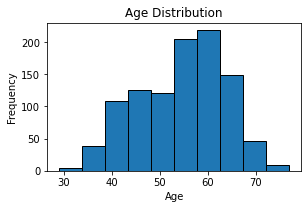

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)  # Create a subplot (2 rows, 2 columns, subplot 1)
plt.hist(DataFrame1['age'], bins=10, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

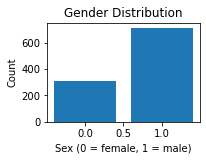

In [23]:
# Bar plot of sex
plt.subplot(2, 2, 2)  # Create a subplot (2 rows, 2 columns, subplot 2)
sex_counts = DataFrame1['sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Count')
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Age vs. Cholesterol')

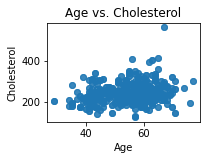

In [24]:
# Scatter plot of age and cholesterol
plt.subplot(2, 2, 3)  # Create a subplot (2 rows, 2 columns, subplot 3)
plt.scatter(DataFrame1['age'], DataFrame1['chol'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs. Cholesterol')

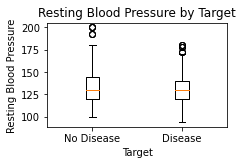

In [25]:
# Box plot of resting blood pressure by target
plt.subplot(2, 2, 4)  # Create a subplot (2 rows, 2 columns, subplot 4)
plt.boxplot([DataFrame1[DataFrame1['target'] == 0]['trestbps'],
             DataFrame1[DataFrame1['target'] == 1]['trestbps']],
            labels=['No Disease', 'Disease'])
plt.xlabel('Target')
plt.ylabel('Resting Blood Pressure')
plt.title('Resting Blood Pressure by Target')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()  # Display the plots

Text(0.5, 1.0, 'NOx(GT) vs. NO2(GT)')

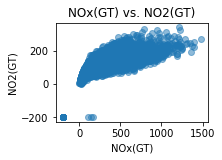

In [26]:
# Scatter plot of NOx(GT) vs. NO2(GT)
plt.subplot(2, 2, 2)  # Create a subplot (2 rows, 2 columns, subplot 2)
plt.scatter(DataFrame2['NOx(GT)'], DataFrame2['NO2(GT)'], alpha=0.5)
plt.xlabel('NOx(GT)')
plt.ylabel('NO2(GT)')
plt.title('NOx(GT) vs. NO2(GT)')

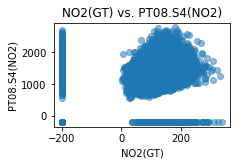

In [29]:
# Scatter plot of NO2(GT) vs. PT08.S4(NO2)
plt.subplot(2, 2, 4)  # Create a subplot (2 rows, 2 columns, subplot 4)
plt.scatter(DataFrame2['NO2(GT)'], DataFrame2['PT08.S4(NO2)'], alpha=0.5)
plt.xlabel('NO2(GT)')
plt.ylabel('PT08.S4(NO2)')
plt.title('NO2(GT) vs. PT08.S4(NO2)')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()  # Display the plots

Text(0.5, 1.0, 'PT08.S1(CO) vs. PT08.S2(NMHC)')

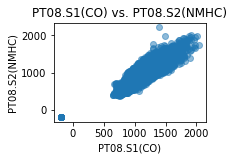

In [30]:
# Scatter plot of PT08.S1(CO) vs. PT08.S2(NMHC)
plt.subplot(2, 2, 2)  # Create a subplot (2 rows, 2 columns, subplot 2)
plt.scatter(DataFrame2['PT08.S1(CO)'], DataFrame2['PT08.S2(NMHC)'], alpha=0.5)
plt.xlabel('PT08.S1(CO)')
plt.ylabel('PT08.S2(NMHC)')
plt.title('PT08.S1(CO) vs. PT08.S2(NMHC)')

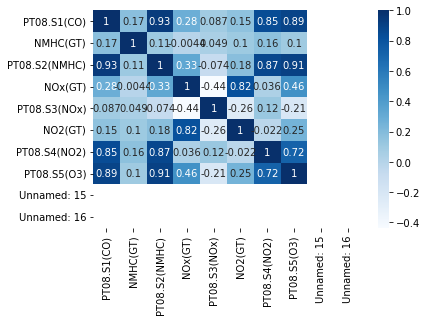

<Figure size 1440x1080 with 0 Axes>

In [28]:
dataplot = sn.heatmap(DataFrame2.corr(), cmap="Blues", annot=True)
mat.figure(figsize=(20,15))
mat.show() #Heatmap Plot provide a 2D array or a correlation matrix.
